In [1]:
from __future__ import division
import json 
import numpy as np
from collections import defaultdict

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [4]:
import graph_utils
%load_ext autoreload
%autoreload 2

## pick the trial with the median MAE to graph 

In [5]:
models_list = ['readme', 'cc', 'acc', 'pcc', 'mnb', 'loglin', 'hybrid']
model2graph_eval = graph_utils.get_median_eval_metrics(models_list)
prop1_model2graph_eval = graph_utils.get_median_eval_metrics(models_list, prop=True)

readme  , median_trial= 5, median_mae=0.224033254928
cc      , median_trial= 5, median_mae=0.0475165358211
acc     , median_trial= 5, median_mae=0.0459934820404
pcc     , median_trial= 7, median_mae=0.0488280765595
mnb     , median_trial= 9, median_mae=0.0733107054651
loglin  , median_trial= 3, median_mae=0.071586245139
hybrid  , median_trial= 4, median_mae=0.0509795091121
readme  , median_trial= 7, median_mae=0.373616674101
cc      , median_trial= 2, median_mae=0.508682352958
acc     , median_trial= 7, median_mae=0.126835678543
pcc     , median_trial= 9, median_mae=0.468790344126
mnb     , median_trial= 3, median_mae=0.176938910552
loglin  , median_trial= 2, median_mae=0.0791328583789
hybrid  , median_trial= 8, median_mae=0.061960231873


In [6]:
joint_model2graph_eval = model2graph_eval
for model, graph_eval in prop1_model2graph_eval.iteritems():
    joint_model2graph_eval[model+', prev=0.1'] = graph_eval
print joint_model2graph_eval.keys()

['acc', 'cc, prev=0.1', 'loglin, prev=0.1', 'acc, prev=0.1', 'cc', 'hybrid', 'pcc, prev=0.1', 'loglin', 'readme, prev=0.1', 'readme', 'pcc', 'mnb', 'hybrid, prev=0.1', 'mnb, prev=0.1']


## GRAPH1: predicted proprotion, test gold proportion with 0.9 confidence intervals 

In [7]:
print joint_model2graph_eval.keys()

['acc', 'cc, prev=0.1', 'loglin, prev=0.1', 'acc, prev=0.1', 'cc', 'hybrid', 'pcc, prev=0.1', 'loglin', 'readme, prev=0.1', 'readme', 'pcc', 'mnb', 'hybrid, prev=0.1', 'mnb, prev=0.1']


In [21]:
#need to order them, need to make it so cc doesn't have confidence intervals
def graph_mae_ci(model2graph_eval):
    #w/ confidence intervals 
    plt.figure(figsize=(49,49))
    for i, model in enumerate(['readme', 'cc', 'acc', 'pcc', 'mnb', 'loglin', 'hybrid', 'readme, prev=0.1', 'cc, prev=0.1', 'acc, prev=0.1', 'pcc, prev=0.1', 'mnb, prev=0.1',  'loglin, prev=0.1', 'hybrid, prev=0.1']):
        graph_eval = model2graph_eval[model]
        plt.subplot(7,7,i+1)
        #plt.scatter(graph_eval['true_labelmeans'],graph_eval['map_est'])
        
        if model.split(',')[0] in ['readme','cc', 'acc']:
            plt.scatter(graph_eval['true_labelmeans'],graph_eval['map_est'], color='black')
            
        else: 
            for jj in xrange(500):
                ci_width = graph_eval['conf_width0.9'][jj]
                map_est = graph_eval['map_est'][jj]
                true_theta = graph_eval['true_labelmeans'][jj]
                ci_coverage = graph_eval['conf_0.9'][jj]

                if ci_coverage == 0: color = 'blue'
                elif ci_coverage == 1: color = 'red'
                #ci line 
                plt.plot((true_theta, true_theta), (map_est- ci_width/2.0, map_est+ ci_width/2.0), 'k-', alpha=0.4)
                plt.scatter(true_theta, map_est, color=color) 

#         plt.xlabel('gold prevalence', fontsize=15)
#         plt.ylabel('predicted prevalence', fontsize=15)

        plt.xticks([0.0, 0.25, 0.5, 0.75, 1.0], fontsize = 40)
        plt.yticks([0.25, 0.5, 0.75, 1.0], fontsize = 40)
        
        natural = '(nat)'
        synthetic = '(syn)'
        
        model2title = {
            'readme': 'ReadMe '+natural,
          'cc': 'CC '+natural, 
            'acc': 'ACC '+natural, 
            'pcc': 'PB-PCC '+natural, 
            'mnb': 'MNB '+natural,
            'loglin': 'Loglin '+natural, 
            'hybrid': 'LR-Implicit '+natural,
            'readme, prev=0.1': 'ReadMe '+synthetic,
            'cc, prev=0.1': 'CC '+synthetic, 
            'acc, prev=0.1': 'ACC '+synthetic, 
            'pcc, prev=0.1': 'PB-PCC '+synthetic,
            'mnb, prev=0.1': 'MNB '+synthetic,
            'loglin, prev=0.1': 'Loglin '+synthetic, 
            'hybrid, prev=0.1': 'LR-Implicit '+synthetic  
        }
        
        plt.title(model2title[model], fontsize=54)
        plt.xlim(0,1);plt.ylim(0,1)
        graph_utils.abline(1,0, plt)
    plt.tight_layout()
    return plt

In [ ]:
fig1 = graph_mae_ci(joint_model2graph_eval)
#fig1.savefig('gold_vs_pred.png', bbox_inches='tight')
fig1.savefig('../writing/figs/gold_vs_pred.png', bbox_inches='tight')
fig1.show()

# now do the breakdown 

In [10]:
split2ndocs = graph_utils.get_bin_size(joint_model2graph_eval)

{0: (201, 315), 1: (315, 635), 2: (635, 10000)}


In [11]:
print joint_model2graph_eval.keys()

['acc', 'cc, prev=0.1', 'loglin, prev=0.1', 'acc, prev=0.1', 'cc', 'hybrid', 'pcc, prev=0.1', 'loglin', 'readme, prev=0.1', 'readme', 'pcc', 'mnb', 'hybrid, prev=0.1', 'mnb, prev=0.1']


In [12]:
model_subsets = ['pcc', 'hybrid']
subset_model2graph_eval = {}
for model, ss in joint_model2graph_eval.iteritems():
    if model in model_subsets:
        subset_model2graph_eval[model] = ss

In [13]:
def plot_binned_CI_rates_pretty(model2graph_eval, split2ndocs):
    model2title = {'pcc': 'PB-PCC', 'hybrid': 'LR-Implicit'}
    model2color = {'pcc': 'r', 'hybrid': 'b'}
    plt.figure(figsize=(40,10))
    
    setfontsize = 50
    ticksize = 35
    
    for i, model in enumerate(model2graph_eval):
        ii = 141+i
        plt.subplot(ii)
        toplot = graph_utils.get_binned_CI_rate(model2graph_eval, model, split2ndocs)
        print model, toplot
        plt.bar(toplot.keys(), toplot.values(), align='center', color=model2color[model])
        plt.xticks(toplot.keys(), split2ndocs.values(), fontsize=ticksize)
        plt.yticks(fontsize=ticksize)
        plt.xlabel('Num. docs in test group', fontsize=setfontsize)
        plt.ylabel('CI coverage rate', fontsize=setfontsize)
        plt.ylim(0, 0.7)
        plt.title(model2title[model], fontsize=setfontsize)
    
    for i, model in enumerate(model2graph_eval):
        ii = 143+i
        plt.subplot(ii)
        toplot = graph_utils.get_binned_CI_width(model2graph_eval, model, split2ndocs)
        print model, toplot
        plt.bar(toplot.keys(), toplot.values(), align='center', color=model2color[model])
        plt.xticks(toplot.keys(), split2ndocs.values(), fontsize=ticksize)
        plt.yticks(fontsize=ticksize)
        plt.xlabel('Num. docs in test group', fontsize=setfontsize)
        plt.ylabel('average CI width', fontsize=setfontsize)
        plt.ylim(0, 0.12)
        plt.title(model2title[model], fontsize=setfontsize)
    plt.tight_layout()
    return plt

pcc {0: 0.3493975903614458, 1: 0.3253012048192771, 2: 0.14285714285714285}
hybrid {0: 0.6686746987951807, 1: 0.5060240963855421, 2: 0.27976190476190477}
pcc {0: 0.060166238919717153, 1: 0.04590827933382348, 2: 0.02853756648638634}
hybrid {0: 0.10492771084337349, 1: 0.07881927710843376, 2: 0.048541666666666664}


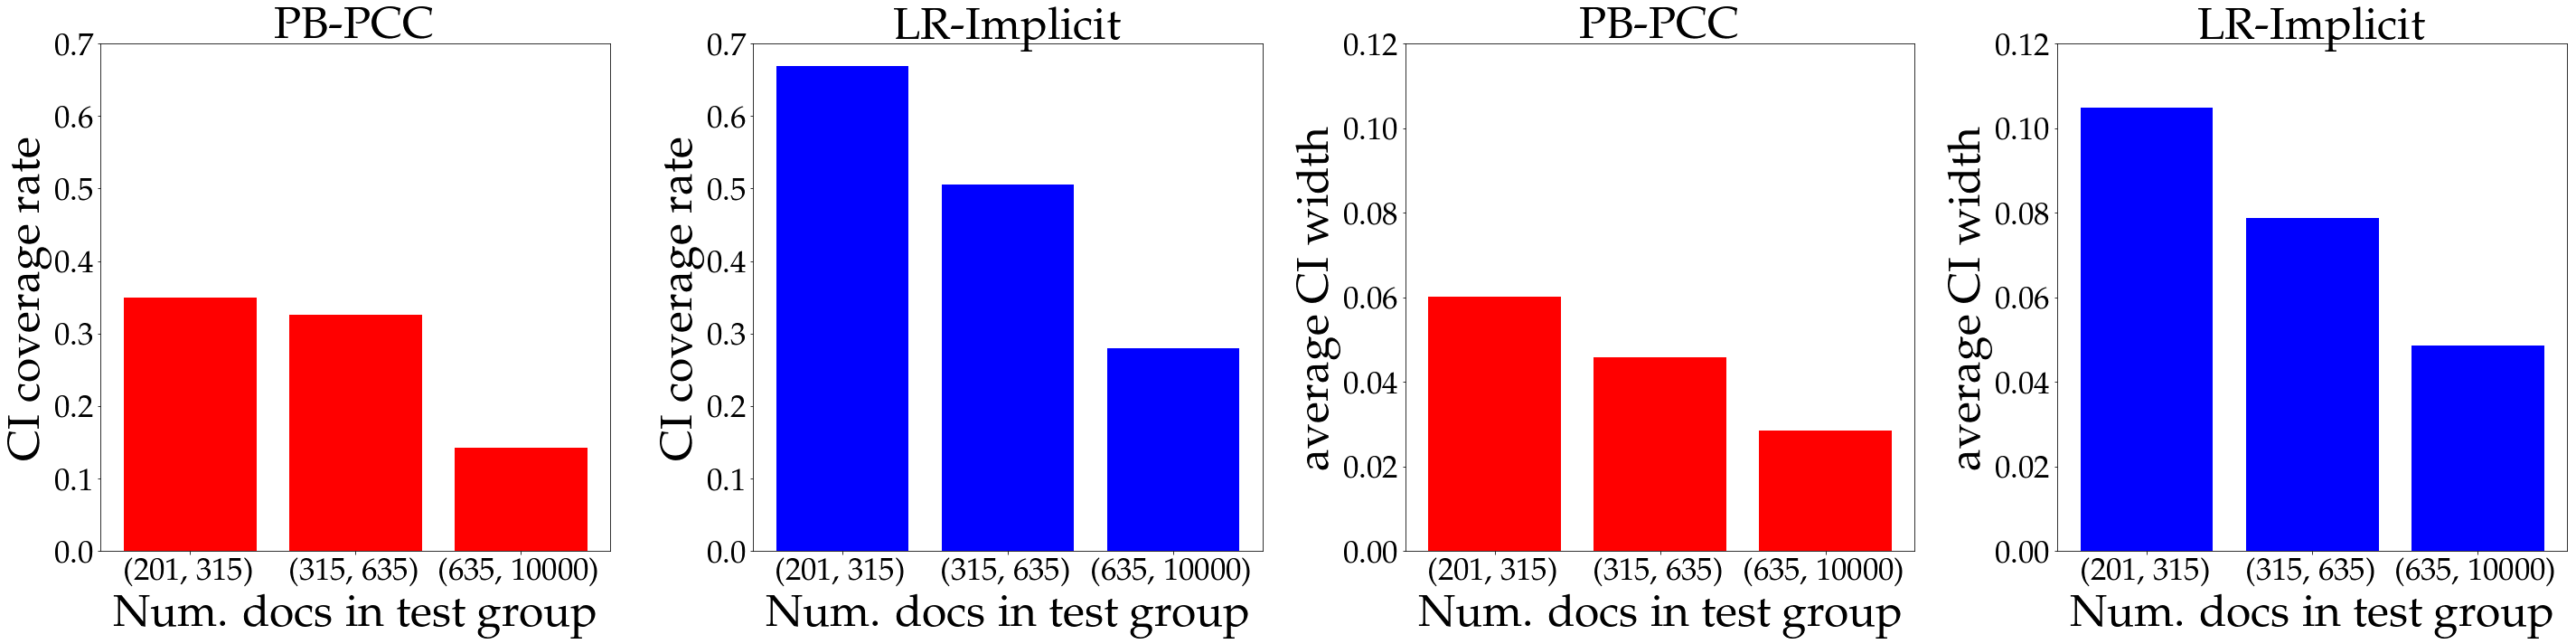

In [14]:
plt = plot_binned_CI_rates_pretty(subset_model2graph_eval, split2ndocs)
plt.savefig('../writing/figs/binned.png', bbox_inches='tight')
plt.show()